# Regression
---------------------------------

Download the abalone dataset from [https://archive.ics.uci.edu/ml/datasets/Abalone](https://archive.ics.uci.edu/ml/datasets/Abalone).
 The goal of this dataset is to predict the age of abalone shells from physical measurements.

### Load the data

In [1]:
# Import packages
import pandas as pd
from atom import ATOMRegressor

# Load the abalone dataset
X = pd.read_csv('../abalone.csv')

In [2]:
# Let's have a look at the dataset
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
# Initlaize ATOM for regression tasks and encode the categorical features
atom = ATOMRegressor(X, y="Rings", verbose=2, random_state=42)
atom.encode()

<<=============== ATOM ===============>>
Initial data cleaning...
Algorithm task: regression.

Dataset stats ===================>
Shape: (4177, 9)
Categorical columns: 1
Scaled: False
----------------------------------
Size of training set: 2923
Size of test set: 1254

Encoding categorical features...


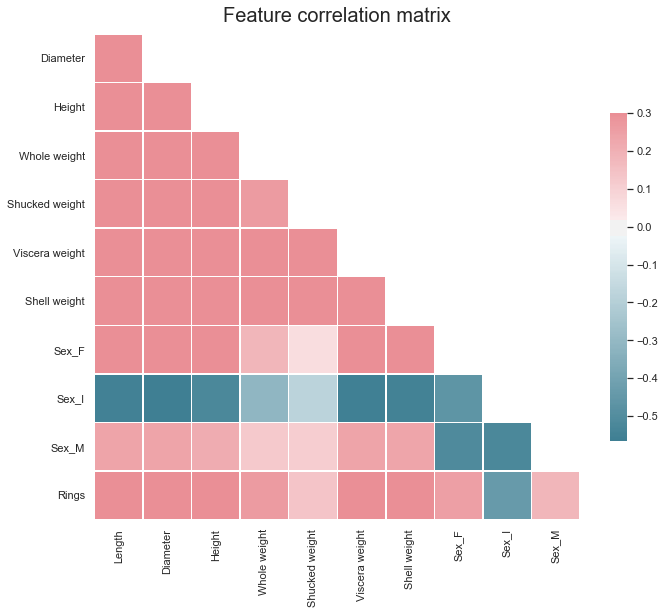

In [4]:
# Plot the dataset's correlation matrix
atom.plot_correlation()

Performing feature selection...


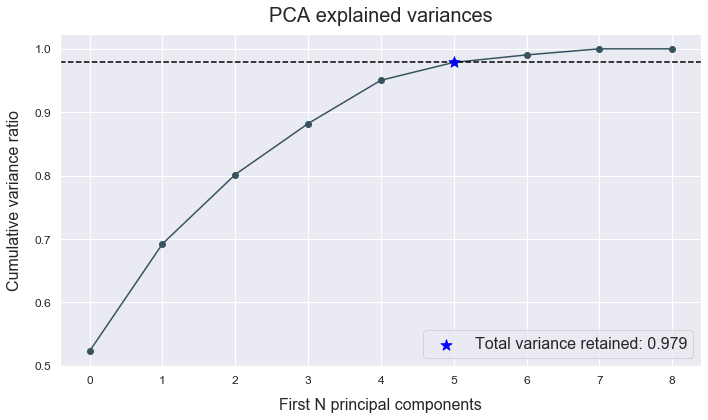

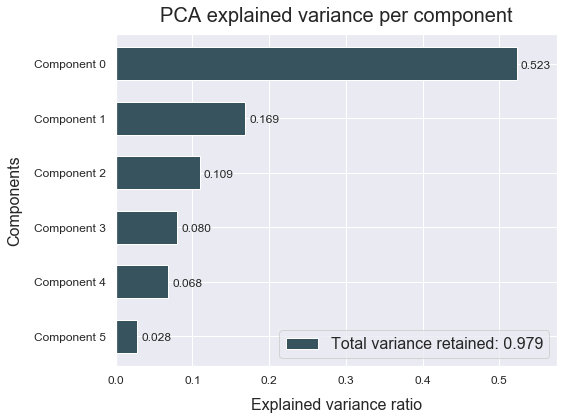

In [5]:
# Apply PCA for dimensionality reduction
atom.feature_selection(strategy="pca", n_features=6)
atom.plot_PCA()
atom.plot_components(figsize=(8, 6), filename='atom_PCA_plot')

### Run the pipeline

In [6]:
atom.pipeline(['tree', 'bag', 'et'],
              metric='neg_mean_squared_error',
              max_iter=5,
              init_points=2,
              cv=1,
              bagging=5)


Running pipeline =================>
Models in pipeline: Tree, Bag, ET
Metric: neg_mean_squared_error


Running BO for Decision Tree...
Final results for Decision Tree:         
Bayesian Optimization ---------------------------
Best hyperparameters: {'criterion': 'mse', 'splitter': 'random', 'max_depth': 10, 'max_features': 0.5, 'min_samples_split': 2, 'min_samples_leaf': 20, 'ccp_alpha': 0.0}
Best score on the BO: -6.6417
Time elapsed: 0.894s
Fitting -----------------------------------------
Score on the training set: -10.0595
Score on the test set: -8.7809
Time elapsed: 0.024s
Bagging -----------------------------------------
Mean: -7.5249   Std: 1.2204
Time elapsed: 0.013s
-------------------------------------------------
Total time: 0.932s


Running BO for Bagging Regressor...
Final results for Bagging Regressor:         
Bayesian Optimization ---------------------------
Best hyperparameters: {'n_estimators': 93, 'max_samples': 0.5, 'max_features': 1.0, 'bootstrap': False, 'bootstr